#FashionMNIST prediction model
A PyTorch model to detect the clothing using Torchvision and using the FashionMNIST database

# Task

To create a Convoluted Neural Network Model using TinyVGG architecture to predict various clothes in fashion mnist [database](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file)


# Author
___________________________________________________________________________________________________________________________
**Amal Varghese**
- [Linkedin](https://www.linkedin.com/in/amal-varghese-670225291/)
- [Github](https://github.com/codewizard-2004)

**Importing necessary libraries**

- PyTorch
- TorchVision
- TorchVision Datasets
- Matplotlib

In [95]:
import torch
import torchvision
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


**Getting the data ready**

For this project we are using data provided by PyTorch datasets

In [96]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

# Exploratory Data Analysis


In [97]:
len(train_data) , len(test_data)

(60000, 10000)

In [98]:
#Check some data examples
image , label = train_data[0]
print(f"Image Shape:{image.shape} -> [Color Channels, height, width]")
class_names = train_data.classes
print(f"Label Names:{class_names}")

Image Shape:torch.Size([1, 28, 28]) -> [Color Channels, height, width]
Label Names:['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [99]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

**Visualize the data**

In [100]:
torch.manual_seed(42)

def visualize_image_batch(row: int , cols: int, data: torchvision.datasets,cmap :str="gray"):
  """
  Visualize a batch of data from a data loader with specified number of rows and columns
  """
  fig = plt.figure(figsize = (9,9))
  for i in range(1 , row*cols+1):
    random_idx = torch.randint(0, len(data) , size = [1]).item()
    img , label = data[random_idx]
    fig.add_subplot(row, cols, i)
    plt.imshow(img.squeeze(), cmap = cmap)
    plt.title(class_names[label])
    plt.axis(False)

In [133]:
def visualize_img(img: torch.tensor,label: int):
  """
  Visualize a single image
  """
  fig = plt.figure(figsize = (9,9))
  plt.imshow(img.squeeze() , cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

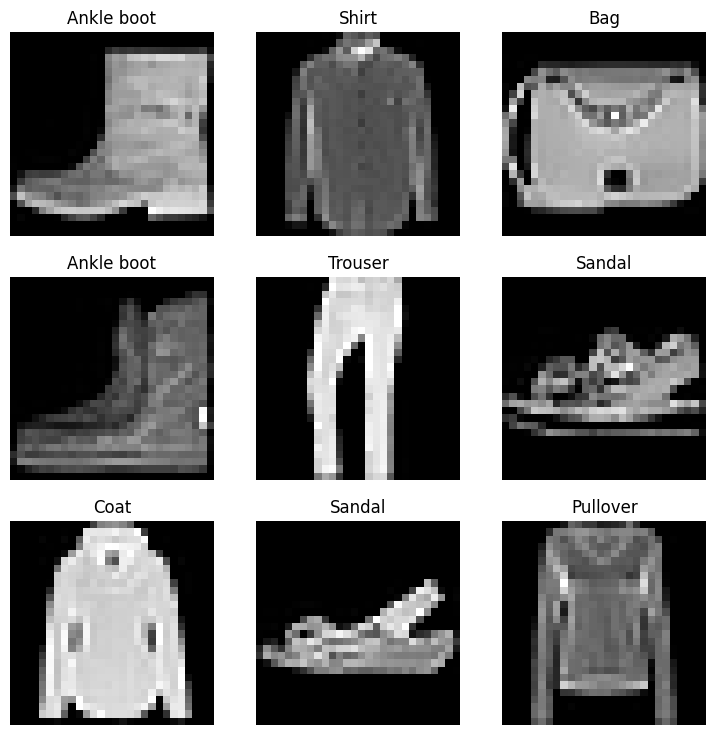

In [101]:
visualize_image_batch(3,3,train_data)

**Prepare the data loader**
- Turns our data into python iterable
- Turn our data into batches for memory efficiency

In [102]:
#Setup batch size parameters
BATCH_SIZE = 32

#turn data into batches
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

print(f"Train DataLoader\n length:{len(train_dataloader)}")
print(f"Test DataLoader\n length: {len(test_dataloader)}")

Train DataLoader
 length:1875
Test DataLoader
 length: 313


In [103]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features_batch.size()}")
print(f"Labels batch shape: {train_labels_batch.size()}")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


torch.Size([1, 28, 28])
Label:7


(-0.5, 27.5, 27.5, -0.5)

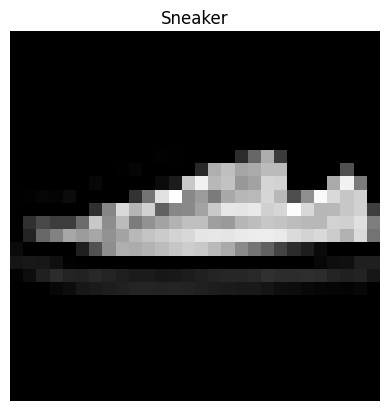

In [104]:
random_idx = torch.randint(0 , len(train_features_batch) , size = [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
print(img.shape)
plt.imshow(img.squeeze() , cmap="gray")
plt.title(class_names[label])
print(f"Label:{label}")
plt.axis(False)

# Creating a model using CNN
- We are going to create a model using CNN
- We are using TinyVgg Architecture

In [105]:
#Setup the available device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [106]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.convo_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
         nn.ReLU(),
         nn.Conv2d(in_channels = hidden_units,
                   out_channels = hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.convo_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self , X:torch.tensor):
    X = self.convo_block_1(X)
    X = self.convo_block_2(X)
    X = self.classifier(X)
    return X

In [107]:
torch.manual_seed(42)

fashion_mnist_model_v0 = FashionMNISTModelV0(input_shape=1,
                                             hidden_units=10,
                                             output_shape=len(class_names)).to(device)

fashion_mnist_model_v0

FashionMNISTModelV0(
  (convo_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convo_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [108]:
fashion_mnist_model_v0.state_dict()

OrderedDict([('convo_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
     

**We have created our model**

Now that we have created a CNN model with tinyVGG architecture, we can try to do a prediction in this untrained data

# Setup loss criterion and optimizer

- We use CrossEntropyLoss() which is used for multiple classification
- For this project we are using Stochastic Gradient Descent with learning rate at 0.1

In [109]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashion_mnist_model_v0.parameters(),
                            lr=0.1)

In [110]:
def get_train_time(start: float,
                   end: float,
                   device: torch.device = device):
  """
  gives the time taken between start and end time of a model
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [111]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  '''
  Returns a dictionary containing the results of the model predicting on data_loader
  '''
  loss, acc = 0 , 0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    #device agnostic
    for X,y in tqdm(data_loader):
      X,y = X.to(device) , y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true = y , y_pred = y_pred.argmax(dim=1))

    #scale the loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__ ,
          "model_loss":loss.item() ,
          "model_acc":acc}


In [112]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  """
  Makes predictions on data using model
  """
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample , dim=0).to(device)

      #forward pass
      pred_logit = model(sample)
      #Apply softmax to logits
      pred_prob = torch.softmax(pred_logit.squeeze() , dim=0)
      pred_probs.append(pred_prob.cpu())

  #stack the pred probs to turn list into a tesnor
  return torch.stack(pred_probs)

In [113]:
# setup loss optimizer
# since we are working with multiclass data we use crossentropy loss
# sgd optimizer
# evaluation metric - accuaracy

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


In [124]:
#Training loop

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
    Performs training with model trying to learn on data loader
  """
  train_loss , train_acc = 0 , 0
  model.train()
  train_loss_stack = []

  for batch, (X,y) in enumerate(data_loader):

    X,y = X.to(device) , y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred , y)
    train_loss_stack.append(loss)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y , y_pred = y_pred.argmax(dim=1))#Logits -> prediction labels

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")


In [125]:
#Creating a testing loop

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """
  Perform a testing loop step on model going over data loader
  """
  test_loss , test_acc = 0 , 0
  test_loss_stack = []

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device) , y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred , y)
      test_loss_stack.append(loss)
      test_loss += loss
      test_acc += accuracy_fn(y_true = y , y_pred = test_pred.argmax(dim=1))

    #Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

We have created a training function , testing loop, a accuracy function and a function to find training time

In [116]:
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----------")
  test_step(model = fashion_mnist_model_v0,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----------
Test loss: 2.30231 | Test acc: 9.99%

Epoch:1
----------
Test loss: 2.30231 | Test acc: 9.99%

Epoch:2
----------
Test loss: 2.30231 | Test acc: 9.99%



As we can see the loss is very high and test accuracy is very low

# Training the model

In [126]:
#Now we are going to train our model

torch.manual_seed(42)

train_time_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----------")
  train_step(model = fashion_mnist_model_v0,
             data_loader = train_dataloader,
             optimizer=optimizer,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model = fashion_mnist_model_v0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()
total_train_time = get_train_time(start = train_time_start,
                                  end = train_time_end)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----------
Train loss: 0.26733 | Train acc: 90.27%

Test loss: 0.28937 | Test acc: 89.43%

Epoch:1
----------
Train loss: 0.26098 | Train acc: 90.40%

Test loss: 0.30095 | Test acc: 88.98%

Epoch:2
----------
Train loss: 0.25725 | Train acc: 90.66%

Test loss: 0.29047 | Test acc: 89.50%

Train time on cpu: 218.378 seconds


#Training Result

After training the model with the data we have have achieved around 88% accuracy and test loss at around 0.3

In [127]:
train_results = eval_model(
    model=fashion_mnist_model_v0,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
train_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.23503631353378296,
 'model_acc': 91.44833333333334}

# Training using models

As we have seen the model have clearly learnt patterns and is ready for some predictions

Item:Ankle boot label:9


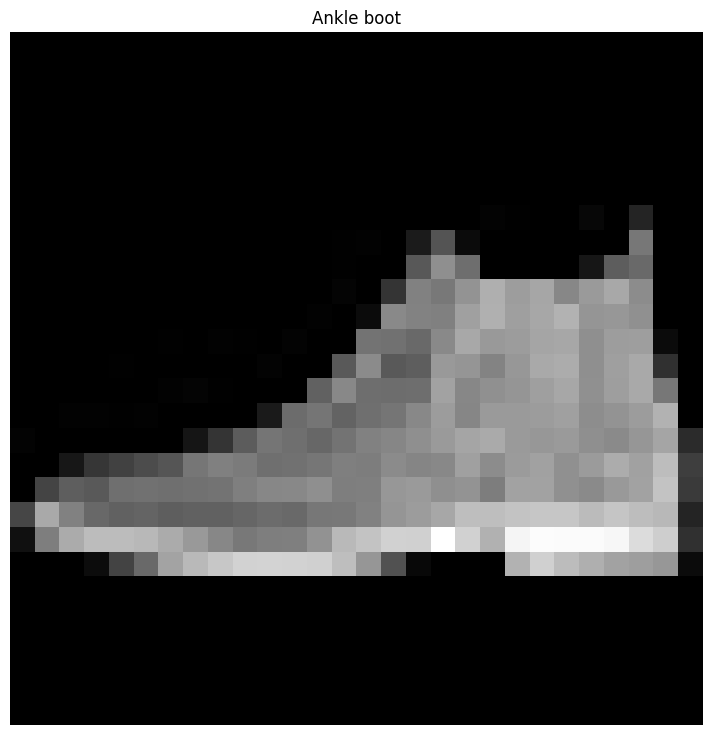

In [161]:
sample , label = test_data[0]
print(f"Item:{class_names[label]} label:{label}")

visualize_img(sample , label)

We have taken this image as a sample for now and lets test it on our model

In [162]:
# pred_logits = fashion_mnist_model_v0(sample.unsqueeze(dim=0))
# pred_probs = pred_logits.argmax(dim=1)
# print(f"Predicted output:{class_names[pred_probs]}")

def make_single_prediction(model: torch.nn.Module,
                           img: torch.tensor,
                           flag: bool = True):
  """
  Makes a single prediction on a single image
  """
  pred_logits = model(img.to(device).unsqueeze(dim = 0)).to(device)
  pred_probs = pred_logits.argmax(dim = 1)
  if flag:
    print(f"Predicted Output: {class_names[pred_probs]}")
  return pred_probs

In [165]:
make_single_prediction(model = fashion_mnist_model_v0,
                       img = sample)

Predicted Output: Ankle boot


tensor([9])

As we can see our model made the right prediction

Now lets make predictions on multiple samples

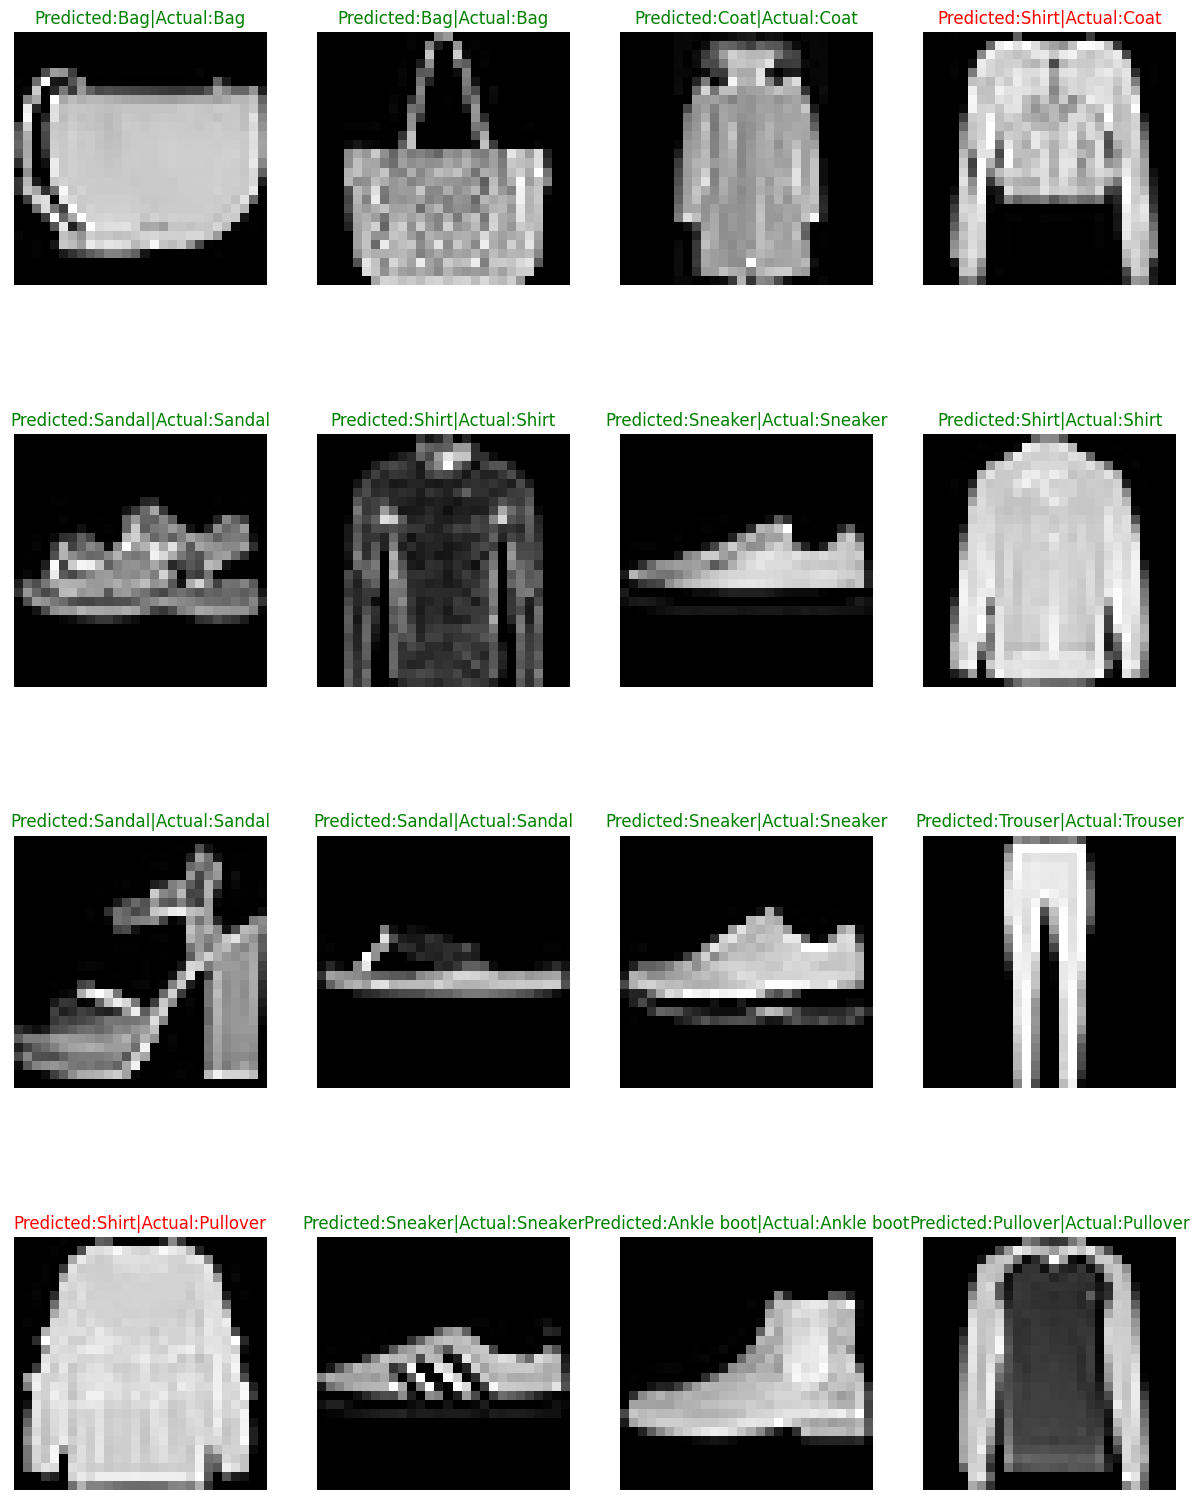

In [171]:
import random

# Generate 50 random numbers between 0 and len(test_data)
random_numbers = [random.randint(0, len(test_data) - 1) for _ in range(16)]

# Create a 10x5 subplot grid
plt.figure(figsize=(15, 20))

for idx, i in enumerate(random_numbers):
    sample, label = test_data[i]

    # Plot the sample
    plt.subplot(4, 4, idx + 1)  # idx + 1 for correct subplot positioning
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.axis('off')  # Hide axes

    # Make prediction
    pred = make_single_prediction(fashion_mnist_model_v0, sample , False)

    # Title with color coding (green for correct, red for incorrect)
    if pred == label:
        plt.title(f"Predicted:{class_names[pred]}|Actual:{class_names[label]}",  color="g")
    else:
        plt.title(f"Predicted:{class_names[pred]}|Actual:{class_names[label]}", color="r")

# Adjust the layout to prevent overlap
plt.show()


#Evaluating our model

We will be evaluating our model with a confusion matrix.
A confusion matrix is a table that compares predicted values to actual values for a dataset to evaluate the performance of a classification model. It's also known as an error matrix.

we use TorchMetrics library and mlxtend for plotting

In [172]:
y_preds = []
fashion_mnist_model_v0.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader , desc="Collecting predicitons"):
    X,y = X.to(device) , y.to(device)
    y_logits = fashion_mnist_model_v0(X)
    y_pred = torch.softmax(y_logits , dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_preds = torch.cat(y_preds)
print(y_preds[:10])

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [173]:
#importing necessary files
try:
  import torchmetrics, mlxtend
  assert int(mlxtend.__version__.split(".")[1]) >=19, "mlxtend should be 0.19 or higher"
  print("torchmetrics and mlxtend are already installed")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 13.6 MB/s eta 0:00:00
mlxtend version: 0.23.1
torchmetrics version: 1.4.2


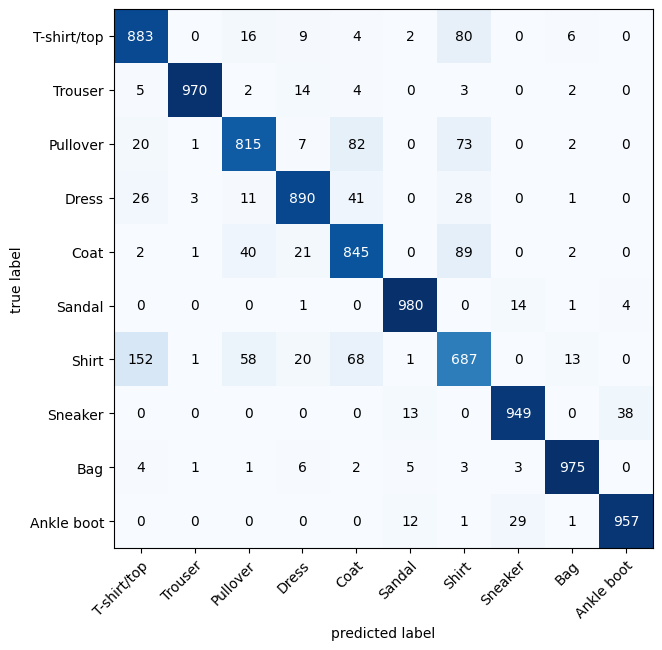

In [175]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup confusion matrix instance
confmat = ConfusionMatrix(num_classes=len(class_names) , task="multiclass")
confmat_tensor = confmat(preds = y_preds ,
                         target = test_data.targets)
#plot the confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(10,7),
    class_names=class_names
)

# Saving Our model

last but not least, we need to save our model for reusability purposes using pytorch save method

In [176]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True , exist_ok=True)

#create model save
model_name = "fashion_mnist_model_v0.pth"
model_save_path = model_path / model_name

#save model sate dict
torch.save(obj=fashion_mnist_model_v0.state_dict() , f=model_save_path)
#